In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow

def train_model():
    rf = Roboflow(api_key="qRfASJGKsv7WNtvVPzTL")
    project = rf.workspace("sanchit-scmvi").project("medicine-bottle-gnk5a")
    version = project.version(3)
    dataset = version.download("yolov8")

    model = YOLO('yolov8s.pt')

    results = model.train(
        data=f"{dataset.location}/data.yaml",

        # 🔥 INCREASED TRAINING PARAMETERS 🔥
        epochs=150,        # More epochs
        patience=30,       # More patience before early stopping
        imgsz=640,

        # 🔥 MORE AGGRESSIVE AUGMENTATION 🔥
        hsv_h=0.03,        # Doubled color variation
        hsv_s=0.8,         # Higher saturation variance
        hsv_v=0.5,         # Higher brightness variance
        degrees=15,        # More rotation
        translate=0.2,     # More translation
        scale=0.7,         # More scaling
        shear=5,           # Add shearing (for curved bottles)
        perspective=0.001, # More perspective distortion
        flipud=0.0,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.1,         # Add mixup augmentation
        copy_paste=0.1,    # Add copy-paste augmentation

        # Performance
        batch=8,
        cache=False,
        workers=2,
        device=0,
        optimizer='AdamW',
        lr0=0.01,          # Higher learning rate
        weight_decay=0.0005,

        # 🔥 FOCUS ON HARD EXAMPLES 🔥
        box=7.5,           # Higher box loss weight
        cls=0.5,           # Classification loss weight
        dfl=1.5,           # DFL loss weight
    )

    print("✅ Training Complete!")

    # Auto-download
    from google.colab import files
    files.download('/content/runs/detect/train2/weights/best.pt')

if __name__ == "__main__":
    train_model()

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to medicine-bottle-3 in yolov8:: 100%|██████████| 2876/2876 [00:00<00:00, 8467.37it/s]


Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/medicine-bottle-3/data.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.03, hsv_s=0.8, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=30, perspectiv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/133_png.rf.f25c793c61616e6e702061d33a893705.jpg: 640x640 6 barcodes, 2 label_rois, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Showing results for: /content/133_png.rf.f25c793c61616e6e702061d33a893705.jpg


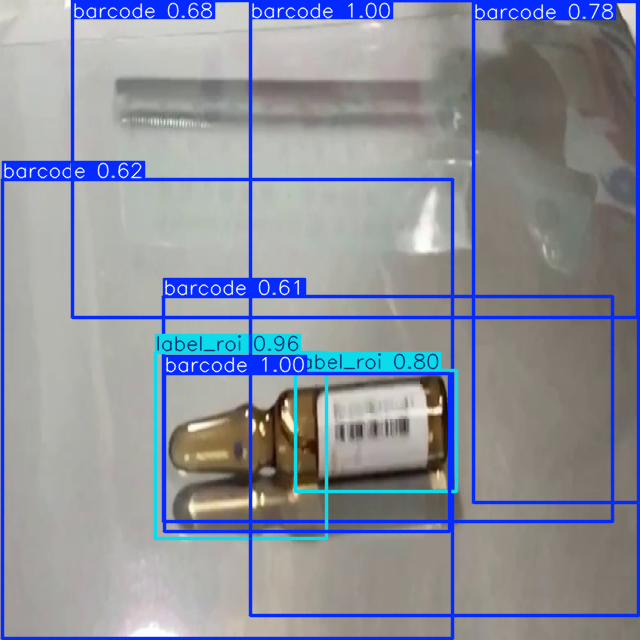

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qRfASJGKsv7WNtvVPzTL")
project = rf.workspace("sanchit-scmvi").project("medicine-bottle-gnk5a")
version = project.version(2)
dataset = version.download("yolov8")
